In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import scipy.signal as conv

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

# Oriented difference of gaussians

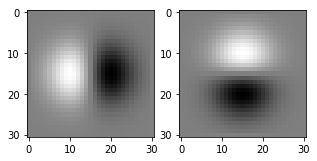

In [93]:
def gaussian_filter(fSize, fSigma):
    x, y = np.mgrid[-fSize//2 + 1:fSize//2 + 1, -fSize//2 + 1:fSize//2 + 1]
    g = np.exp(-( (x**2 + y**2) / (2.0*fSigma**2) ))
    return g/g.sum()

def elongated_gaussian_filter(fSize, rad, fSigma1, fSigma2):
    
    a = np.cos(rad)
    b = np.sin(rad)
    c = np.cos(rad + np.pi/2)
    d = np.sin(rad + np.pi/2)  
       
    x, y = np.mgrid[-fSize//2 + 1:fSize//2 + 1, -fSize//2 + 1:fSize//2 + 1]
    g = np.exp( -((a*x + b*y)**2 / (2.0*fSigma1**2)) - ((c*x + d*y)**2 / (2.0*fSigma2**2)) )
    return g/g.sum()

dx = np.matrix([[-1,  0,  1]])
dy = np.matrix([[-1],[0],[1]])

# dog 1
dog_x1 = cv2.filter2D(gaussian_filter(31,5), -1, dx)
dog_y1 = cv2.filter2D(gaussian_filter(31,5), -1, dy)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(dog_x1)
plt.subplot(1,2,2)
plt.imshow(dog_y1)
plt.show()

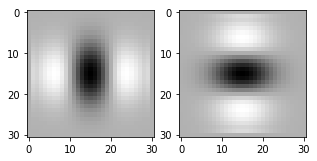

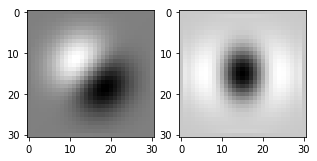

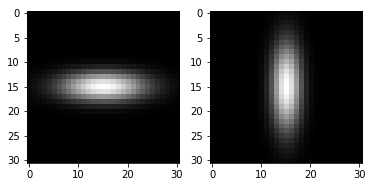

In [69]:
# dog 2
dog_x2 = cv2.filter2D(dog_x, -1, dx)
dog_y2 = cv2.filter2D(dog_y, -1, dy)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(dog_x2)
plt.subplot(1,2,2)
plt.imshow(dog_y2)

# oriented dog
angle = 45
oriented_dog1 = np.cos(np.deg2rad(45)) * dog_x1 + np.sin(np.deg2rad(45)) * dog_y1
oriented_dog2 = np.cos(np.deg2rad(20)) * dog_x2 + np.sin(np.deg2rad(20)) * dog_y2
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(oriented_dog1)
plt.subplot(1,2,2)
plt.imshow(oriented_dog2)
plt.show()

# elongated g
g1 = elongated_gaussian_filter(31, np.deg2rad(0), 2, 6)
g2 = elongated_gaussian_filter(31, np.deg2rad(90), 2, 6)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(g1)
plt.subplot(1,2,2)
plt.imshow(g2)

#plt.figure()
#plt.imshow(np.cos(np.deg2rad(45)) * g2 + np.sin(np.deg2rad(45)) * g1)

Gabor

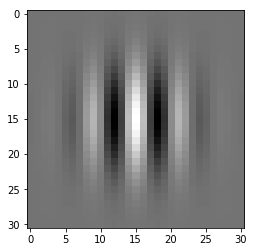

In [91]:

def create_gabor_filter(fSize, fSigma):
    
    g = np.zeros(shape=(fSize,fSize), dtype="float")
    
    center = int(fSize / 2)
    for xx in range(0, fSize):
        for yy in range(0, fSize):
            
            x = xx - center
            y = yy - center
                       
            a = 1
            b = 0
            
            g[yy,xx] = np.cos(a*x + b*y) * np.exp(- (x**2 + y**2) / (2*fSigma**2))
            
    return g/g.sum()

plt.figure()
g = create_gabor_filter(31,5)
plt.imshow(g)
    

FFT

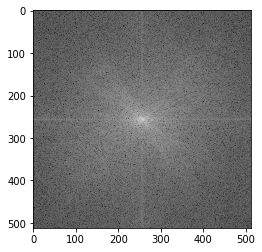

In [18]:
def compute_dft(image):   

    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.imshow(magnitude_spectrum)
    #magnitude_spectrum = fshift

    #plt.subplot(121),plt.imshow(image, cmap = 'gray')
    #plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    #plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    #plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    #plt.show()
    
im = cv2.imread("lena.png", 0)
compute_dft(im)